In [1]:
# Importing Libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
def sigmoid(x):
    x= 1/(1 + np.exp(-x))
    return x

In [3]:
def accuracy(A,W,X,b,Y):
    Z=np.dot(W.T, X.T)+b
    A = sigmoid(Z)
    A = A>0.5
    A = np.array(A, dtype = 'int64')
    #print(np.sum(np.absolute(A-Y)))
    acc = (1 - np.sum(np.absolute(A-Y))/Y.shape[1])*100
    return acc

In [4]:
def model_fn(X_train, Y_train, alpha, n, X_validate, Y_validate):
    
    row, col = X_train.shape
    print(row,",",col)
    
    W = np.zeros((col,1))
    b=0
    cost_list = []
    accuracy_train_list = []
    accuracy_val_list = []
    
    for i in range(n):
        X = np.dot(W.T, X_train.T) + b
                    #W.T = (1,8) , #X_train.T = (8,460)
        A = sigmoid(X)
        # A = (1,460)
       
        cost = (-1)*(1/row)*np.sum( np.multiply(Y_train, np.log(A)) + np.multiply((1-Y_train),np.log(1-A)))
        cost_list.append(cost)
        
        delW = (1/row)*np.dot(A-Y_train, X_train)
                            #(1,460)    (460,8)
        delb = (1/row)*np.sum(A-Y_train)
        W = W - alpha*delW.T
        b = b - alpha*delb
        
        accu1 = accuracy(A, W, X_train, b, Y_train)
        accu2 = accuracy(A, W, X_validate, b, Y_validate)
        accuracy_train_list.append(accu1)
        accuracy_val_list.append(accu2)
        
        
    #print("accuracy test: ", accuracy_list)
    #print(A-Y_train)
    print(W)
    return A, W, b, cost_list, accuracy_train_list, accuracy_val_list

    

In [5]:
input_file = pd.read_csv("Diabetes.csv")
input_file['Glucose'] = input_file['Glucose'].replace(0, input_file['Glucose'].mean())
input_file['BloodPressure'] = input_file['BloodPressure'].replace(0, input_file['BloodPressure'].mean())
input_file['BMI'] = input_file['BMI'].replace(0, input_file['BMI'].mean())
input_file['SkinThickness'] = input_file['SkinThickness'].replace(0, input_file['SkinThickness'].mean())
input_file['Insulin'] = input_file['Insulin'].replace(0, input_file['Insulin'].mean())


#input_file.head(10)


In [6]:
output = np.asmatrix(input_file['Outcome']).T
print(output.shape)
features = np.asmatrix(input_file[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
print(features.T.shape)
feat = features.T

for i in range(8):
    feat[i] = (feat[i] - feat[i].min())/(feat[i].max() - feat[i].min())

    
features = feat.T
#print(feat[6])

(768, 1)
(8, 768)


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(features, output, test_size=0.2)
print(Y_train.shape)
print(Y_test.shape)



(614, 1)
(154, 1)


In [8]:
X_train2, X_validate, Y_train2, Y_validate = train_test_split(X_train, Y_train, test_size=0.25)
print(Y_train2.shape)
print(X_train2.shape)
print(len(Y_validate))


(460, 1)
(460, 8)
154


training data set:
460 , 8
[[ 1.51250271]
 [ 5.53598672]
 [-1.24123601]
 [ 1.1541017 ]
 [-0.6620954 ]
 [ 4.16072766]
 [ 1.78778536]
 [ 1.39833961]]
Accuracy of the model is:  76.3 %
validation data set accuracy:
Accuracy of the model is:  80.52 %
testing data set accuracy:
Accuracy of the model is:  77.27 %


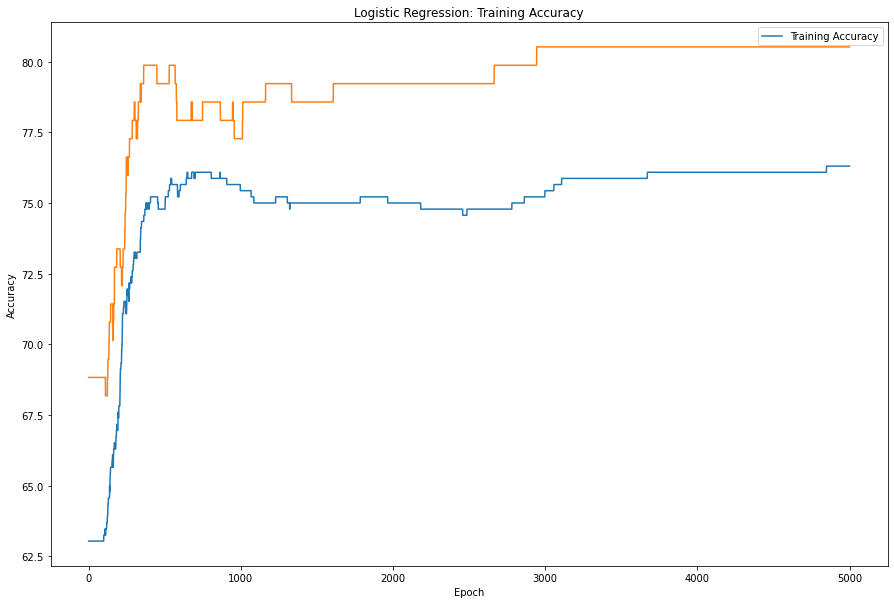

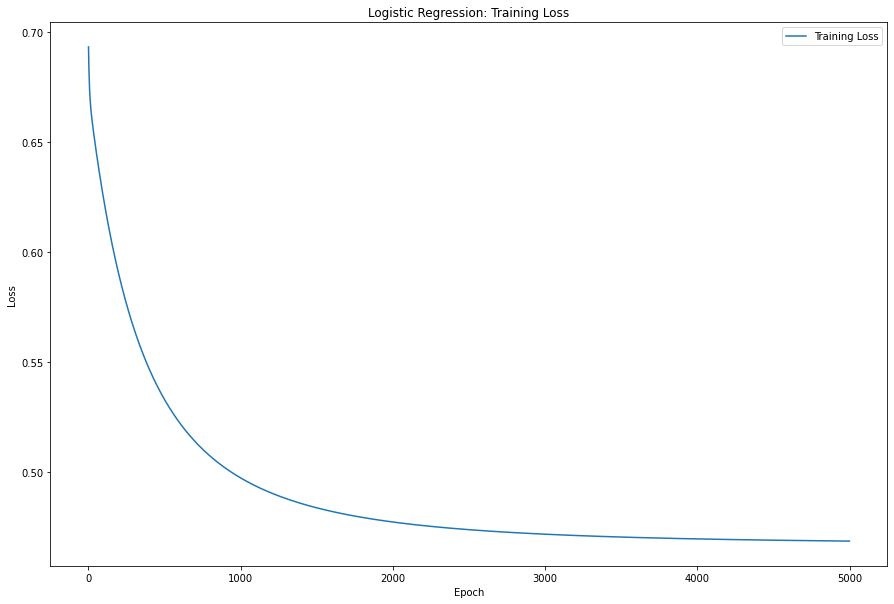

In [9]:
n = 5000

lambd = 0.2

print("training data set:")
A, W, b, cost_list, accuracy_train_list, accuracy_val_list = model_fn(X_train2, Y_train2.T, lambd, n, X_validate, Y_validate.T)
acc = accuracy(A, W, X_train2, b, Y_train2.T)
print("Accuracy of the model is: ", round(acc,2), "%")

print("validation data set accuracy:")
acc1 = accuracy(A, W , X_validate, b, Y_validate.T)
print("Accuracy of the model is: ", round(acc1,2), "%")

print("testing data set accuracy:")
acc2 = accuracy(A, W, X_test, b, Y_test.T)
print("Accuracy of the model is: ", round(acc2,2), "%")

# Accuracy
plt.figure(figsize=(15, 10))
plt.plot(accuracy_train_list)
plt.plot(accuracy_val_list)
plt.title('Logistic Regression: Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy'], loc='upper right')
plt.show()

# Loss
plt.figure(figsize=(15, 10))
plt.plot(cost_list)
#plt.plot(history.history['val_loss'])
plt.title('Logistic Regression: Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss'], loc='upper right')
plt.show()


In [10]:
#Assignment 1 - Part2

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import regularizers
import tensorflow as tf

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 83,522
Trainable params: 83,522
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
8/8 [==============================] - 2s 83ms/step - loss: 2.9893 - accuracy: 0.6391 - val_loss: 1.4257 - val_accuracy: 0.6883
Epoch 2/150
8/8 [==============================] - 0s 15ms/step - loss: 1.3441 - accuracy: 0.6935 - val_l

Epoch 53/150
8/8 [==============================] - 0s 15ms/step - loss: 0.5581 - accuracy: 0.7804 - val_loss: 0.5673 - val_accuracy: 0.7922
Epoch 54/150
8/8 [==============================] - 0s 14ms/step - loss: 0.5516 - accuracy: 0.7848 - val_loss: 0.5790 - val_accuracy: 0.7792
Epoch 55/150
8/8 [==============================] - 0s 15ms/step - loss: 0.5590 - accuracy: 0.7761 - val_loss: 0.5827 - val_accuracy: 0.7857
Epoch 56/150
8/8 [==============================] - 0s 15ms/step - loss: 0.5580 - accuracy: 0.7848 - val_loss: 0.6083 - val_accuracy: 0.7662
Epoch 57/150
8/8 [==============================] - 0s 16ms/step - loss: 0.5571 - accuracy: 0.7891 - val_loss: 0.5800 - val_accuracy: 0.7792
Epoch 58/150
8/8 [==============================] - 0s 15ms/step - loss: 0.5474 - accuracy: 0.7913 - val_loss: 0.5574 - val_accuracy: 0.7987
Epoch 59/150
8/8 [==============================] - 0s 16ms/step - loss: 0.5612 - accuracy: 0.7652 - val_loss: 0.6082 - val_accuracy: 0.7597
Epoch 60/150


8/8 [==============================] - 0s 17ms/step - loss: 0.5425 - accuracy: 0.7826 - val_loss: 0.6287 - val_accuracy: 0.7597
Epoch 112/150
8/8 [==============================] - 0s 16ms/step - loss: 0.5501 - accuracy: 0.7891 - val_loss: 0.5992 - val_accuracy: 0.7727
Epoch 113/150
8/8 [==============================] - 0s 17ms/step - loss: 0.5424 - accuracy: 0.7913 - val_loss: 0.5950 - val_accuracy: 0.7792
Epoch 114/150
8/8 [==============================] - 0s 16ms/step - loss: 0.5516 - accuracy: 0.7717 - val_loss: 0.6321 - val_accuracy: 0.7662
Epoch 115/150
8/8 [==============================] - 0s 16ms/step - loss: 0.5427 - accuracy: 0.7848 - val_loss: 0.5881 - val_accuracy: 0.7922
Epoch 116/150
8/8 [==============================] - 0s 20ms/step - loss: 0.5354 - accuracy: 0.7804 - val_loss: 0.5998 - val_accuracy: 0.7792
Epoch 117/150
8/8 [==============================] - 0s 20ms/step - loss: 0.5356 - accuracy: 0.7891 - val_loss: 0.6206 - val_accuracy: 0.7727
Epoch 118/150
8/8 [=

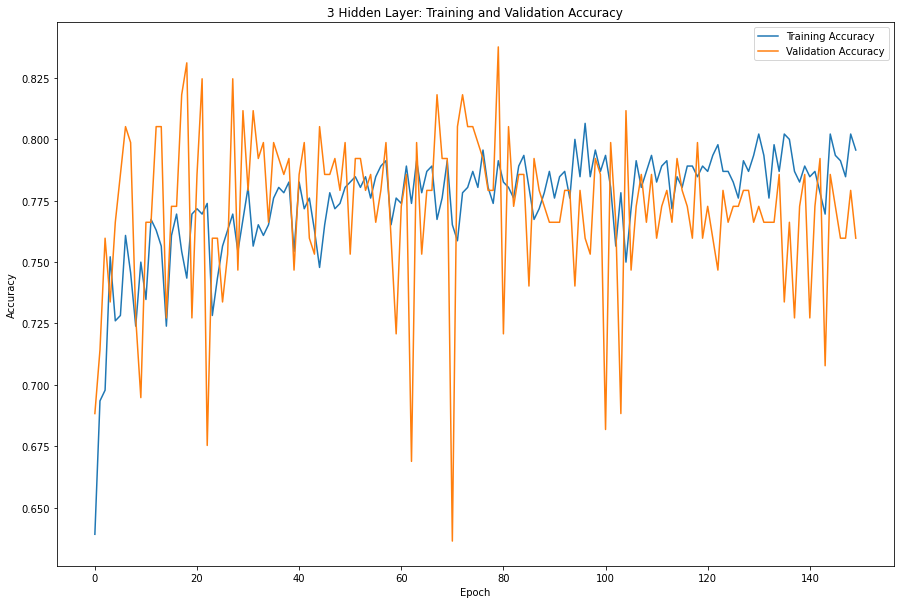

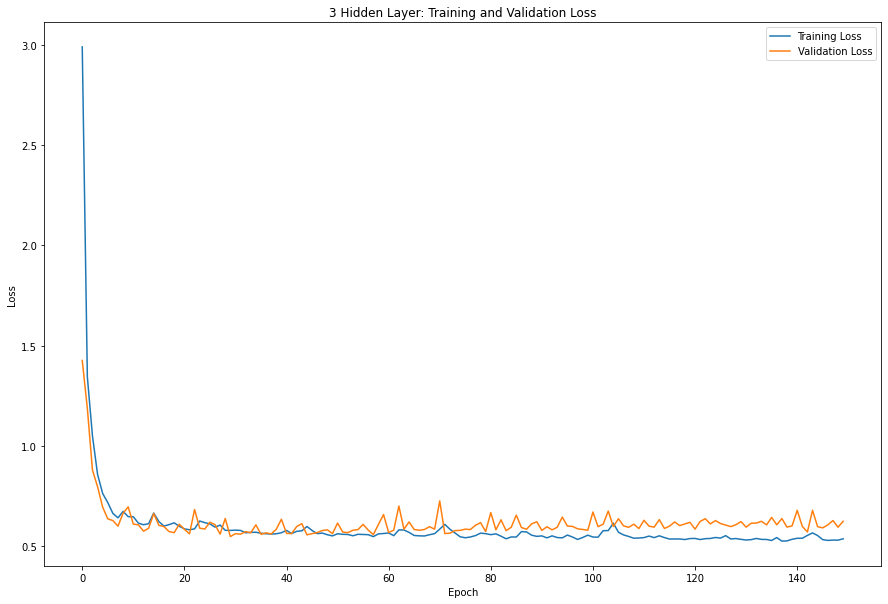

In [11]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=8, kernel_regularizer=regularizers.l1(0.001)))#  Hidden layer 1.
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  #hidden layer 2.
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001,0.001)))  #  Hidden layer 3.
model.add(Dense(2, activation='sigmoid'))   #  Output layer.(Since there are 2 classes)


model.compile(optimizer=Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# Training the model.
history = model.fit(X_train2, to_categorical(Y_train2),
                    validation_data=(X_validate, to_categorical(Y_validate)), epochs=150, batch_size=64)

# Evaluating the model
loss, accuracy = model.evaluate(X_test, to_categorical(Y_test))
print('\n\n Loss', loss, 'Accuracy:', accuracy)

# Plot the accuracy and loss.

# Accuracy
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('3 Hidden Layer: Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

# Loss
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('3 Hidden Layer: Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 130       
Total params: 4,866
Trainable params: 4,866
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
8/8 [==============================] - 2s 86ms/step - loss: 1.0813 - accuracy: 0.6217 - val_loss: 0.9186 - val_accuracy: 0.7078
Epoch 2/150
8/8 [==============================] - 0s 15ms/step - loss: 0.8165 - accuracy: 0.7326 - val_loss: 0.7211 - val_accuracy: 0.6948
Epoch 3/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7277 - accuracy: 0.7022

Epoch 54/150
8/8 [==============================] - 0s 13ms/step - loss: 0.4915 - accuracy: 0.7783 - val_loss: 0.5205 - val_accuracy: 0.7597
Epoch 55/150
8/8 [==============================] - 0s 13ms/step - loss: 0.5107 - accuracy: 0.7543 - val_loss: 0.4905 - val_accuracy: 0.7727
Epoch 56/150
8/8 [==============================] - 0s 16ms/step - loss: 0.4957 - accuracy: 0.7587 - val_loss: 0.4685 - val_accuracy: 0.7922
Epoch 57/150
8/8 [==============================] - 0s 15ms/step - loss: 0.4881 - accuracy: 0.7891 - val_loss: 0.4914 - val_accuracy: 0.7792
Epoch 58/150
8/8 [==============================] - 0s 13ms/step - loss: 0.4832 - accuracy: 0.7913 - val_loss: 0.4699 - val_accuracy: 0.7922
Epoch 59/150
8/8 [==============================] - 0s 13ms/step - loss: 0.4862 - accuracy: 0.7891 - val_loss: 0.5123 - val_accuracy: 0.7662
Epoch 60/150
8/8 [==============================] - 0s 12ms/step - loss: 0.4841 - accuracy: 0.7826 - val_loss: 0.4602 - val_accuracy: 0.8052
Epoch 61/150


8/8 [==============================] - 0s 13ms/step - loss: 0.4706 - accuracy: 0.7891 - val_loss: 0.4761 - val_accuracy: 0.7922
Epoch 113/150
8/8 [==============================] - 0s 15ms/step - loss: 0.4759 - accuracy: 0.7870 - val_loss: 0.5341 - val_accuracy: 0.7338
Epoch 114/150
8/8 [==============================] - 0s 15ms/step - loss: 0.4719 - accuracy: 0.7826 - val_loss: 0.4804 - val_accuracy: 0.7662
Epoch 115/150
8/8 [==============================] - 0s 15ms/step - loss: 0.4698 - accuracy: 0.7826 - val_loss: 0.5152 - val_accuracy: 0.7532
Epoch 116/150
8/8 [==============================] - 0s 14ms/step - loss: 0.4664 - accuracy: 0.7696 - val_loss: 0.4843 - val_accuracy: 0.7857
Epoch 117/150
8/8 [==============================] - 0s 14ms/step - loss: 0.4597 - accuracy: 0.7935 - val_loss: 0.4992 - val_accuracy: 0.7727
Epoch 118/150
8/8 [==============================] - 0s 13ms/step - loss: 0.4633 - accuracy: 0.7826 - val_loss: 0.5041 - val_accuracy: 0.7662
Epoch 119/150
8/8 [=

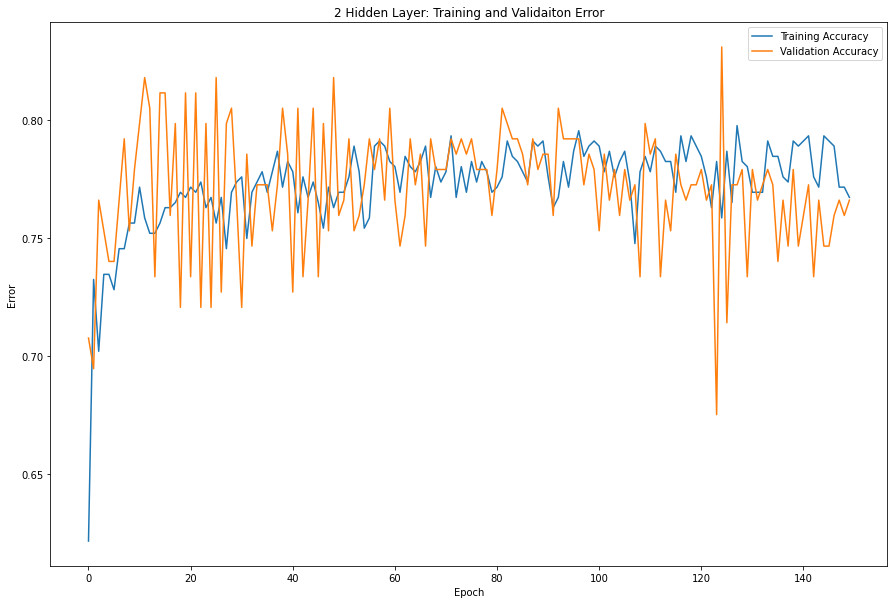

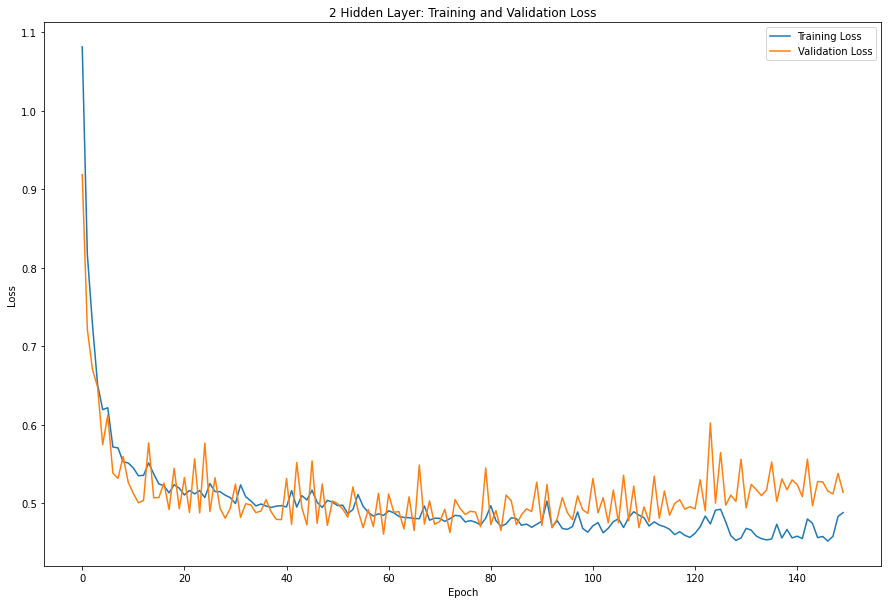

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                576       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 130       
Total params: 706
Trainable params: 706
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
8/8 [==============================] - 2s 100ms/step - loss: 0.6660 - accuracy: 0.6348 - val_loss: 0.6105 - val_accuracy: 0.7273
Epoch 2/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6114 - accuracy: 0.6457 - val_loss: 0.5769 - val_accuracy: 0.7597
Epoch 3/150
8/8 [==============================] - 0s 13ms/step - loss: 0.5806 - accuracy: 0.7196 - 

Epoch 54/150
8/8 [==============================] - 0s 13ms/step - loss: 0.4205 - accuracy: 0.7870 - val_loss: 0.4643 - val_accuracy: 0.7922
Epoch 55/150
8/8 [==============================] - 0s 12ms/step - loss: 0.4216 - accuracy: 0.7935 - val_loss: 0.4451 - val_accuracy: 0.7727
Epoch 56/150
8/8 [==============================] - 0s 12ms/step - loss: 0.4271 - accuracy: 0.7804 - val_loss: 0.4431 - val_accuracy: 0.7922
Epoch 57/150
8/8 [==============================] - 0s 13ms/step - loss: 0.4218 - accuracy: 0.7891 - val_loss: 0.4536 - val_accuracy: 0.7857
Epoch 58/150
8/8 [==============================] - 0s 13ms/step - loss: 0.4241 - accuracy: 0.8065 - val_loss: 0.4413 - val_accuracy: 0.7792
Epoch 59/150
8/8 [==============================] - 0s 13ms/step - loss: 0.4253 - accuracy: 0.8022 - val_loss: 0.4715 - val_accuracy: 0.7792
Epoch 60/150
8/8 [==============================] - 0s 12ms/step - loss: 0.4263 - accuracy: 0.7870 - val_loss: 0.4472 - val_accuracy: 0.7857
Epoch 61/150


8/8 [==============================] - 0s 12ms/step - loss: 0.3969 - accuracy: 0.8174 - val_loss: 0.4856 - val_accuracy: 0.7662
Epoch 113/150
8/8 [==============================] - 0s 13ms/step - loss: 0.3861 - accuracy: 0.8087 - val_loss: 0.4682 - val_accuracy: 0.7662
Epoch 114/150
8/8 [==============================] - 0s 12ms/step - loss: 0.3855 - accuracy: 0.8130 - val_loss: 0.4926 - val_accuracy: 0.7597
Epoch 115/150
8/8 [==============================] - 0s 12ms/step - loss: 0.3961 - accuracy: 0.8087 - val_loss: 0.4840 - val_accuracy: 0.7727
Epoch 116/150
8/8 [==============================] - 0s 12ms/step - loss: 0.3862 - accuracy: 0.8087 - val_loss: 0.4756 - val_accuracy: 0.7597
Epoch 117/150
8/8 [==============================] - 0s 13ms/step - loss: 0.3870 - accuracy: 0.8196 - val_loss: 0.4897 - val_accuracy: 0.7468
Epoch 118/150
8/8 [==============================] - 0s 13ms/step - loss: 0.3852 - accuracy: 0.8109 - val_loss: 0.4791 - val_accuracy: 0.7857
Epoch 119/150
8/8 [=

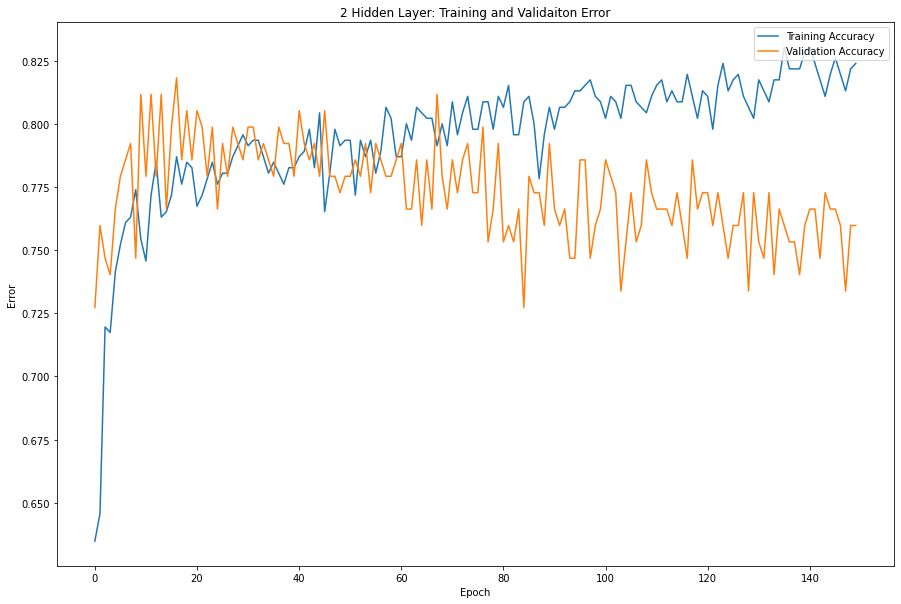

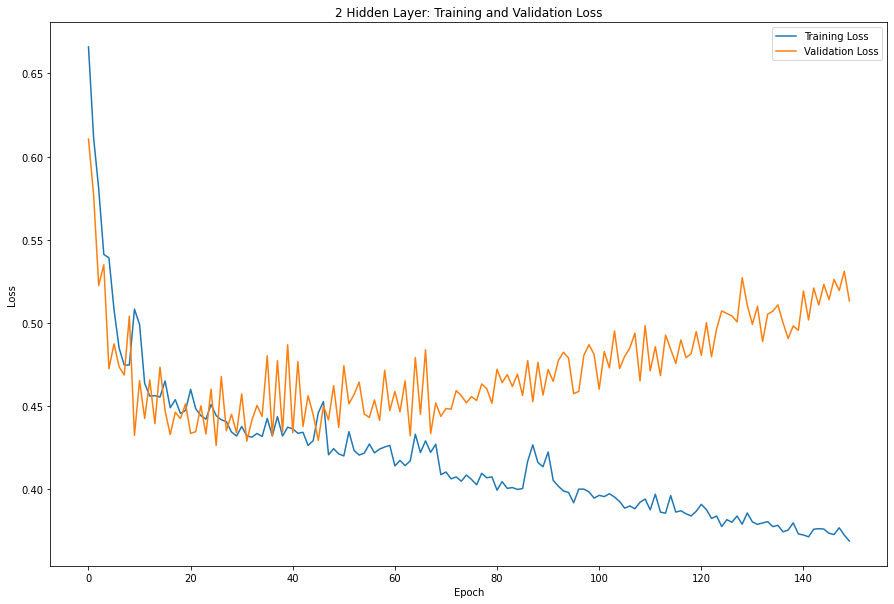

In [12]:
#Assignment 1 - Part 3

# Neural Network with only L1/L2 regularization
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=8, kernel_regularizer=regularizers.l1(0.001))) #  Hidden layer.
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)))  #hidden layer.
model.add(Dense(2, activation='sigmoid'))   #  Output layer.(Since there are 2 classes)


model.compile(optimizer=Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# Training the model.
history = model.fit(X_train2, to_categorical(Y_train2),
                    validation_data=(X_validate, to_categorical(Y_validate)), epochs=150, batch_size=64)

# Evaluating the model
loss, accuracy = model.evaluate(X_test, to_categorical(Y_test))
print('\n\n Loss', loss, 'Accuracy:', accuracy)

# Plot the accuracy and loss.

# Accuracy
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('2 Hidden Layer: Training and Validaiton Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

# Loss
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('2 Hidden Layer: Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()


#Neural network with only dropout layer

model1 = Sequential()
model1.add(Dense(64, activation='relu', input_dim=8)) #  Hidden layer.
model1.add(Dropout(0.002))
model1.add(Dense(2, activation='sigmoid'))   #  Output layer.(Since there are 2 classes)

model1.compile(optimizer=Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])
print(model1.summary())

# Training the model.
history = model1.fit(X_train2, to_categorical(Y_train2),
                    validation_data=(X_validate, to_categorical(Y_validate)), epochs=150, batch_size=64)

# Evaluating the model
loss, accuracy = model1.evaluate(X_test, to_categorical(Y_test))
print('\n\n Loss', loss, 'Accuracy:', accuracy)

# Plot the accuracy and loss.

# Accuracy
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('2 Hidden Layer: Training and Validaiton Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

# Loss
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('2 Hidden Layer: Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()
